In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
A = np.load('data/adj_Bike_DC_60.npy') # change the loading folder
X = np.load('data/Bike_DC_60.npy')

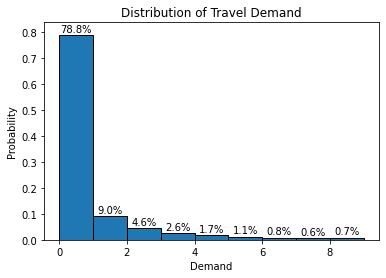

In [8]:
# Sample data: 1000 random numbers from a normal distribution
data = X = X.reshape(-1,1)# Adjust this to your data.

# Specifying your own bins
bin_edges = [i for i in range(0, 10)]   # Bins from -5 to 5 with a width of 0.5

# Compute the histogram with densities (probabilities)
counts, bins, patches = plt.hist(data, bins=bin_edges, edgecolor='black', density=True)

# Convert bar heights to percentages
total_area = sum(np.diff(bins)*counts)  # This should be close to 1 with density=True
max_height = 0  # To keep track of the highest bar to adjust y-limits
for count, patch in zip(counts, patches):
    percentage = (count / total_area) * 100  # Convert bar height to percentage
    height = patch.get_height()
    if height > max_height:
        max_height = height
    plt.text(patch.get_x() + patch.get_width()/2., height + 0.005, f'{percentage:.1f}%', 
             ha='center', va='bottom')  # Adjust the "0.005" as necessary

# Setting the limits on y-axis to account for the text labels
plt.ylim(0, max_height + 0.05)  # Adjust the "0.05" if the text labels get cut off

# Setting a title and labels
plt.title("Distribution of Travel Demand")
plt.xlabel("Demand")
plt.ylabel("Probability")



# Display the histogram
plt.show()


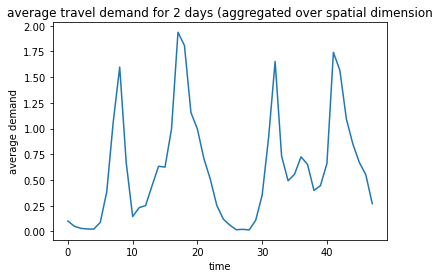

In [36]:
plt.plot(np.mean(X,-1)[:48])
plt.title("average travel demand for 2 days (aggregated over spatial dimension")
plt.xlabel("time")
plt.ylabel("average demand")
plt.show()

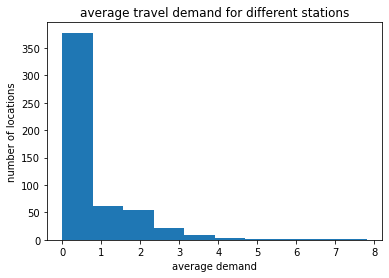

In [40]:
plt.hist(np.mean(X,0))
plt.title("average travel demand for different stations")
plt.xlabel("average demand")
plt.ylabel("number of locations")
plt.show()

We can know that the demand has spatial patterns. Some locations are busy, while some locations are spare. 

Statistics of data

In [41]:

# Convert to a pandas DataFrame
df = pd.DataFrame(X)

# Get statistics
mean = df.mean()
median = df.median()
std_dev = df.std()
min_values = df.min()
max_values = df.max()
percentiles = df.quantile([0.25, 0.5, 0.75])

print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nStandard Deviation:\n", std_dev)
print("\nMin values:\n", min_values)
print("\nMax values:\n", max_values)
print("\nPercentiles:\n", percentiles)


Mean:
 0      0.202642
1      0.275639
2      0.647041
3      0.553265
4      0.313359
         ...   
527    0.000000
528    0.000000
529    0.000000
530    0.000000
531    0.000000
Length: 532, dtype: float64

Median:
 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
527    0.0
528    0.0
529    0.0
530    0.0
531    0.0
Length: 532, dtype: float64

Standard Deviation:
 0      0.612128
1      0.661995
2      1.289999
3      1.078002
4      0.698991
         ...   
527    0.000000
528    0.000000
529    0.000000
530    0.000000
531    0.000000
Length: 532, dtype: float64

Min values:
 0      0
1      0
2      0
3      0
4      0
      ..
527    0
528    0
529    0
530    0
531    0
Length: 532, dtype: int32

Max values:
 0      12
1       8
2      15
3      12
4       7
       ..
527     0
528     0
529     0
530     0
531     0
Length: 532, dtype: int32

Percentiles:
       0    1    2    3    4    5    6    7    8    9    ...  522  523  524  \
0.25  0.0  0.0  0.0  0